In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7
%matplotlib inline
from sklearn import linear_model

In [28]:
from sklearn import linear_model
from scipy import stats
import numpy as np


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse[i] * 
                                           np.linalg.inv(np.dot(X.T, X))))
                       for i in range(sse.shape[0])])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

In [13]:
df = pd.read_csv("data/islr/Auto.csv")

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
df = df[df.horsepower != "?"]

In [16]:
df["mpg"] = df["mpg"].apply(float)
df["horsepower"] = df["horsepower"].apply(float)

In [30]:
clf = linear_model.LinearRegression()
clf.fit(df.horsepower.values.reshape(-1,1), df.mpg.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

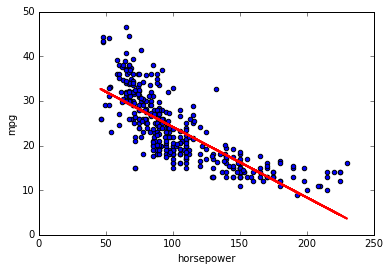

In [31]:
ax = df.plot(x="horsepower", y="mpg", kind="scatter")
ax.plot(df.horsepower.values, clf.intercept_ + clf.coef_ * df.horsepower, lw=2, color="r")

In [32]:
print "R^2 = %s"%clf.score(df.horsepower.values.reshape(-1,1), df.mpg.values)
print "Value for 98 is %s"%clf.predict(98.)[0]

R^2 = 0.605948257889
Value for 98 is 24.4670771525


In [14]:
clf.t

AttributeError: 'LinearRegression' object has no attribute 't'